# 卷积神经网络

卷积神经网络是一种前馈型神经网络, 受生物自然视觉认知机制启发而来的. 现在, CNN 已经成为众多科学领域的研究热点之一, 特别是在模式分类领域, 由于该网络避免了对图像的复杂前期预处理, 可以直接输入原始图像, 因而得到了更为广泛的应用. 可应用于图像分类, 目标识别, 目标检测, 语义分割等等.

CNN基本组成结构

1.输入层：数据的输入，但不是一维的向量，而是保留图片结构

2.卷积层：使用固定的尺寸和权值的卷积核（也称滤波器），以一定的步长移动，对输入的矩阵进行滤波，加偏执，最后激活，最终组成一个特征图

3.池化层：类比卷积核，以固定尺寸，一定步长移动，用最大池化或者平均池化对卷积层得到的特征进行差采样，加偏置，激活，组成一个更小的特征图

4.全链接层：在CNN尾部进行拟合，减少特征值丢失

5.输出层：输出结果

## 卷积层 

以一张图片为例，以像素值为元素，将图片转化为矩阵。如下图，比如有一个5 * 5的矩阵，使用一个3 * 3的卷积核进行卷积，最后会得到一个3 * 3的特征图，卷积核也叫滤波器
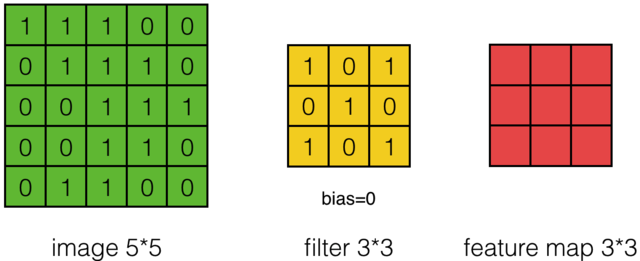

具体操作如图所示
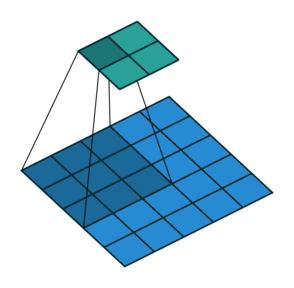
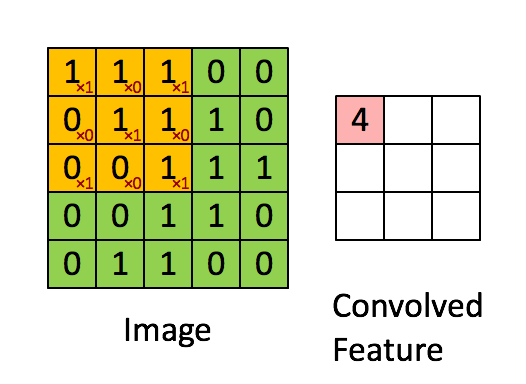

黄色的区域表示卷积核在输入矩阵中滑动, 每滑动到一个位置, 将对应数字相乘并求和, 得到一个特征图矩阵的元素. 注意到, 动图中卷积核每次滑动了一个单位, 实际上滑动的幅度可以根据需要进行调整. 如果滑动步幅大于 1, 则卷积核有可能无法恰好滑到边缘, 针对这种情况, 可在矩阵最外层补零, 补一层零后的矩阵如下图所示: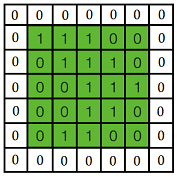
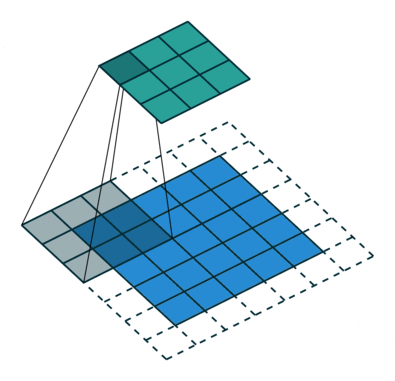

补零层是一个超参数，补零层的设置要根据卷积核的大小、步幅，输入矩阵的大小进行调整，以使卷积层滑到边缘

    注：  超参数是在开始学习过程之前设置值的参数，而不是通过训练得到的参数数据。通常情况下，需要对超参数进行优化，给学习机选择一组最优超参数，以提高学习的性能和效果。

特征图大小的设置

设输入的矩阵大小为w * w，卷积核大小为k * k，步幅为s，补零层数为p，则特征图大小为

        特征图大小 =（w+2*p-k）/s+1

通常把一张图片分解为根据r g b分为三维的矩阵，此时输入的矩阵是3组，卷积层也相应的变为3层

如图
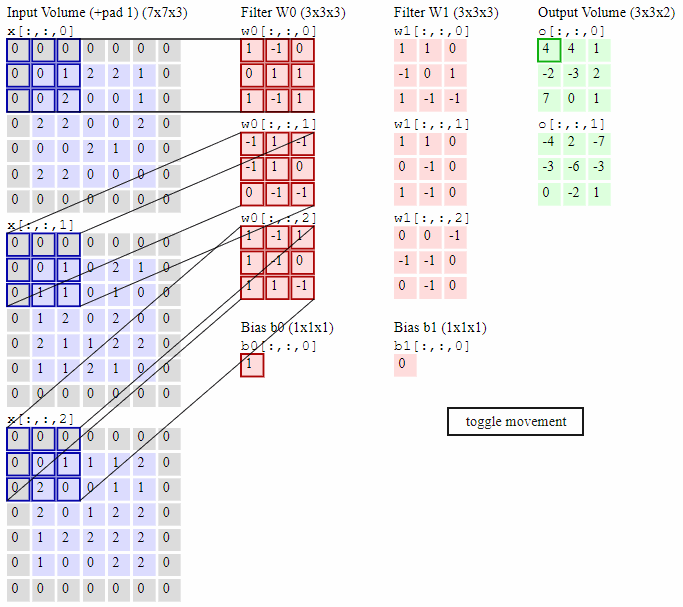

最左边的是输入的特征图矩阵，深度为3，补零层数为1，移动步幅为2

在这里，每次滑动会得到三个数，这三个数之和作为卷积层的输出，等到最右边两个特征图

## 池化层

卷层得到的特征图需要通过池化降低数据数量

池化方法一般为  最大值池化和平局值池化

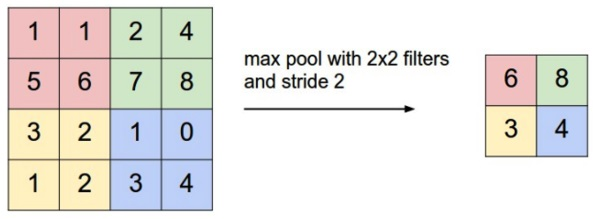和卷积一样, 池化也有一个滑动的核, 可以称之为滑动窗口, 上图中滑动窗口的大小为 2×2, 步幅为 2, 每滑动到一个区域, 则取最大值作为输出, 这样的操作称为 Max Pooling. 还可以采用输出均值的方式, 称为 Mean Pooling.

## 全连接层

全连接层为神经网络层

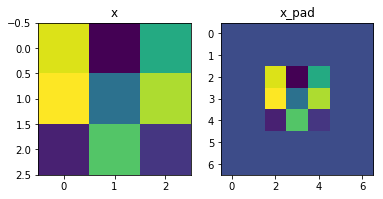

In [3]:
#  padding  补零填充代码

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
def zero_pad(X, pad):
    X_pad = np.pad(X, ((0,0), (pad, pad), (pad, pad), (0, 0)), 'constant')    
    return X_pad
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])
plt.show()